## Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


### 1.Goal 
The Goal of this project is To build the predictive model to find out the sales of each product at a particular store.
So, that BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### 2.Hypothesis Generation

**Hypothesis Generation Based On Various Factors;**

###### 1. Population Density & Demographics

* The Population of market area plays big role in sales. If the Mart is located in high population density area it's more likely to increase sales and vice-versa.
* Similarly, what kind of financially capable people live in a radius of an outlet can greatly cause sales volumn. 

* Demographics plays important role in sales of certain product. Imagine a town where most of the population is young, what prodcut is most like to make high sale? offcourse 'Drinks' and Trendy stuff.

###### 2. Max Retail Price & Discount

* It's obvious that MRP and discount plays key role in sales of certain product. If the MRP is low and Discount amount is high it's more like to make high sales and vice-versa. 

###### 3. Location

* The location where the Mart is located is very important if Mart is located center of city or in front side of the key area that Mart more likely to make more sale that Mart that are located in deep side of the city.

###### 4. Age Of an Outlet.

* Age of an outlet can affect the sales in positive and negative way. In some cases long estabilished outlet may have earned repution and loyal customer than newly introduce outlet. on the other hand some people may catagorize old outlet as out dated or would like to try new somewhere else. so, Age of an outlet might affect sales.


###### 6. Manufacturer
* Sales of certain product depends up on Manufacturer of a product. People prefer product that are Manufactured by well known and trusted Manufacturer than newly estabilished one and failed one.


###### 8. Payment Options

* In the age of digitalization sales can be affected by payment options. while most of outlet accept online payment in current trend people may also like to buy product with crypto. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

### Loading the Sales data


In [2]:
df = pd.read_csv('train.csv').set_index('Item_Identifier')
df_test = pd.read_csv('test.csv').set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
Outlet_Identifier = df_test.Outlet_Identifier

In [4]:
#dtale.show(df)

In [5]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [6]:
# Concise summary of train DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [7]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 8523
Columns: 11


In [8]:
df.drop('Outlet_Establishment_Year', axis = 1).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


### Data Exploration

* #### Dealing With Mis-entered values in columns

In [9]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
#replace LF by Low Fat and reg by Regular in Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

##replace LF by Low Fat and reg by Regular in Item_Fat_Content column in test dataset
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].str.replace('LF','Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].str.replace('low fat','Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].str.replace('reg','Regular')

* ##### Dealing with Nan values Columns


In [11]:
df.isnull().sum()/len(df)*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
print('Count Outlet Type:\n',df.Outlet_Size.value_counts(),
      
      '\n Most Frqeuent Outlet type;', df.Outlet_Size.mode()
     )


Count Outlet Type:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 
 Most Frqeuent Outlet type; 0    Medium
Name: Outlet_Size, dtype: object


In [14]:
#Dealing with missing values in train dataset
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace = True)
df.Outlet_Size.fillna('Medium', inplace = True)

#Dealing with missing values in test dataset
df_test.Item_Weight.fillna(df.Item_Weight.mean(),inplace = True)
df_test.Outlet_Size.fillna('Medium', inplace = True)

In [15]:
df.isnull().sum()/len(df)*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [16]:
df_test.isnull().sum()/len(df)*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

* #### Creating New column

In [17]:
df['Age'] = 2022 - df['Outlet_Establishment_Year'].astype(int) 
df.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

#for test data
df_test['Age'] = 2022 - df_test['Outlet_Establishment_Year'].astype(int) 
df_test.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

### Exploratory Data Analysis


In [18]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Distribution of Item_MRP ')

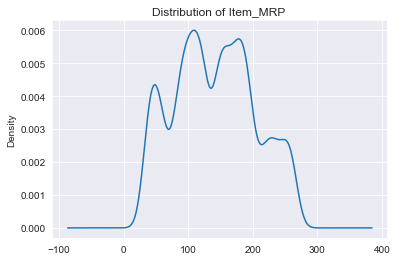

In [19]:
df.Item_MRP.plot(kind = 'kde');
plt.title('Distribution of Item_MRP ')

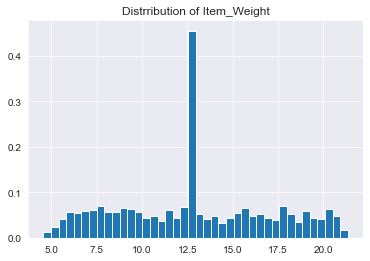

In [20]:
plt.hist(df.Item_Weight, bins = 40, density = True)
plt.title('Distrribution of Item_Weight');

* ####  Looking for high cardinality column

In [21]:
print(df.select_dtypes('object').nunique())

# for c in df:
#     if df[c].dtype == 'object' and df[c].nunique() > 20:
#         df.drop(columns = c, inplace = True)
# df.shape
col = [c for c in df if df[c].dtype == 'object' and df[c].nunique() > 20]
col

Item_Fat_Content         2
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64


[]

* #### Removing Outliers

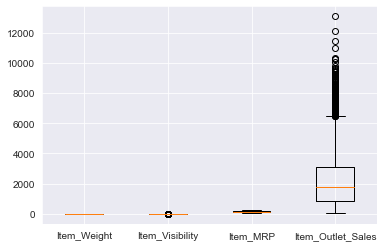

In [22]:
box = df.select_dtypes('number').drop('Age', axis = 1)
plt.boxplot(box.values, labels = box.columns);

In [23]:
#for outlet sale
low, high = df.Item_Outlet_Sales.quantile([0.01, 0.99])
mask_sales = df.Item_Outlet_Sales.between(low,high)
df = df[mask_sales]

* ####   Multicollinarity

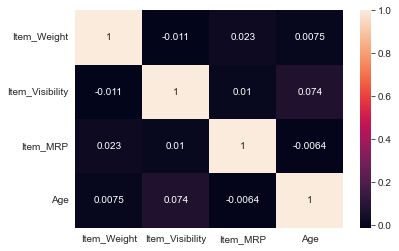

In [24]:
corr = df.select_dtypes('number').drop(columns = ['Item_Outlet_Sales']).corr()
sns.heatmap(corr, annot = True);

In [25]:
# Alternative for above steps
# For cleaness of code we can create wrange function
# def wrangle(filepath):
    
#     #loading data
#     df = pd.read_csv(filepath).set_index('Item_Identifier')
#     #df_test1 = pd.read_csv('test.csv')
    
#     #replace LF by Low Fat and reg by Regular in Item_Fat_Content column
#     df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')
#     df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')
#     df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

#     #Dealing with missing values in train dataset
#     df.Item_Weight.fillna(df.Item_Weight.median(),inplace = True)
#     df.Outlet_Size.fillna('Medium', inplace = True)
    
#     #Creating New column 'Age'
#     df['Age'] = 2022 - df['Outlet_Establishment_Year'].astype(int) 
#     df.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

#     #removing high cardinality columns if there is 
#     #col = [c for c in df1 if df1[c].dtype == 'object' and df1[c].nunique() > 20]
#     #df1.drop(columns = col, inplace = True)
    
   
    
    
#     return df
# df = wrangle('train.csv')
# df1 = wrangle('test.csv')

# #removing outliers
# #(since test.csv does not contain 'Item_Outlet_Sales' it'll through error if we try to write this code inside wrangle function)
# low, high = df.Item_Outlet_Sales.quantile([0.01, 0.99])
# mask_sales = df.Item_Outlet_Sales.between(low,high)
# df = df[mask_sales]

# """

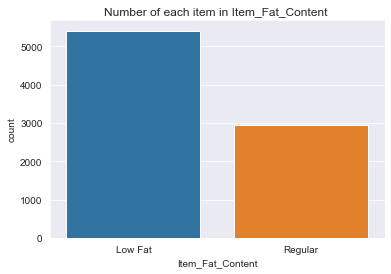

In [26]:
sns.countplot(df.Item_Fat_Content)
plt.title('Number of each item in Item_Fat_Content ');

In [27]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Age'],
      dtype='object')

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [29]:
df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

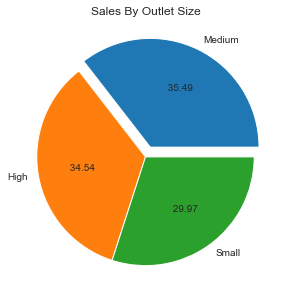

In [30]:
plt.figure(figsize = (10,5))
plt.pie(df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean(), 
    labels = ['Medium', 'High', 'Small'], 
    explode = [0.1,0,0], autopct = '% 0.2f')
plt.title('Sales By Outlet Size');

In [31]:
(df['Age'] == 24).sum()

514

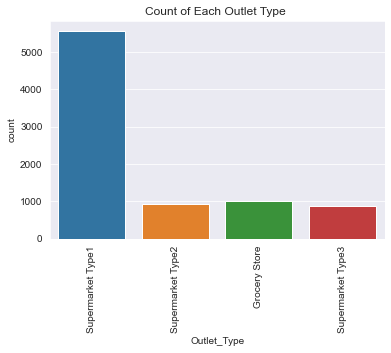

In [32]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation = 'vertical')
plt.title('Count of Each Outlet Type ');

Text(0.5, 1.0, 'Sales by Outlet Type')

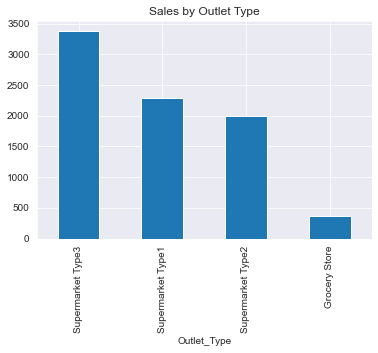

In [33]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Sales by Outlet Type')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

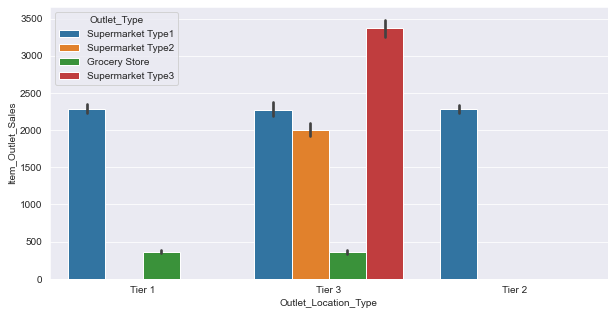

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales',hue = 'Outlet_Type', data = df)

In [35]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
Low Fat    2111.061976
Regular    2186.877169
Name: Item_Outlet_Sales, dtype: float64

#### Feature Selection 

In [36]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Age'],
      dtype='object')

In [37]:
#Drop Outlet_Identifier
df.drop('Outlet_Identifier', axis = 1, inplace = True)
df_test.drop(columns = ['Outlet_Identifier'], inplace = True)

In [38]:
#select X matrix
X = df.drop('Item_Outlet_Sales', axis = 1)

#select target varaible 
y = df.Item_Outlet_Sales

In [39]:
print('Shape X-matrics:', X.shape)
print('Shape Y-series:', y.shape)

Shape X-matrics: (8352, 9)
Shape Y-series: (8352,)


### Split 


In [40]:
X_train_full, X_val_full, y_train, y_val = train_test_split(X,y, train_size = 0.80, random_state = 0)

In [41]:
categorical_col = [c for c in X_train_full if X_train_full[c].dtype == 'object']
numerical_col = [c for c in X_train_full if  X_train_full[c].dtype in('int64', 'float64', 'int32')]

In [42]:
my_cols = numerical_col + categorical_col
X_train = X_train_full[my_cols].copy()
X_val = X_val_full[my_cols].copy()

In [43]:
my_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Age',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
#preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy = 'constant')

#preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('oh', OneHotEncoder(handle_unknown = 'ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_col),
    ('cat', categorical_transformer, categorical_col),
    
])

### Define The Model

* ### Linear Regression

In [45]:
model = LinearRegression()

#### Create and Evaluate the Pipeline

In [46]:
my_pipeline1 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])

In [47]:
# Preprocessing of training data, fit model 
my_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type', 'Outlet_Size',
                                       

In [48]:
# Preprocessing of validation data, get predictions
preds1 = my_pipeline1.predict(X_val)

#### Evaluate the model

In [49]:
MAE1 = mean_absolute_error(preds1, y_val)
R2_1  = r2_score(preds1, y_val)
print('MAE:', round(MAE1, 2))
print('R2:', round(R2_1, 2))


MAE: 782.22
R2: 0.16


In [50]:
#model performance On test dataset
predt = my_pipeline1.predict(df_test)
print('Model: Linear Regression \nMethod: pipeline\nR2 On Test Dataset:',round(r2_score(predt[:1671], y_val),2))

Model: Linear Regression 
Method: pipeline
R2 On Test Dataset: -1.68


* ### Ridge Regression

In [51]:
from category_encoders import OrdinalEncoder, OneHotEncoder

In [52]:
my_pipeline2 = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    Ridge()
)

In [53]:
my_pipeline2.fit(X,y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Item_Fat_Content', 'Item_Type',
                                     'Outlet_Size', 'Outlet_Location_Type',
                                     'Outlet_Type'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [54]:
preds2 = my_pipeline2.predict(X_val_full)

#### Evaluate the model

In [55]:
MAE2 = mean_absolute_error(preds2, y_val)
R2_2 = r2_score(preds2, y_val)
print('MAE:', round(MAE2, 2))
print('R2:', round(R2_2, 2))

MAE: 778.8
R2: 0.17


In [56]:
#model performance On test dataset
predst1 = my_pipeline2.predict(df_test)
print('Model: Ridge Regression \nMethod: make_pipeline\nR2 On Test Dataset:',round(r2_score(predst1[:1671], y_val),2))

Model: Ridge Regression 
Method: make_pipeline
R2 On Test Dataset: -1.67


* ### Random Forest

In [57]:
my_pipeline3 = make_pipeline(
    
    OneHotEncoder(use_cat_names = True),
    RandomForestRegressor(n_estimators = 100, random_state = 1)
)

In [58]:
my_pipeline3.fit(X_train_full,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Item_Fat_Content', 'Item_Type',
                                     'Outlet_Size', 'Outlet_Location_Type',
                                     'Outlet_Type'],
                               use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [59]:
preds3 = my_pipeline3.predict(X_val_full)

#### Evaluate the model

In [60]:
MAE3 = mean_absolute_error(preds3, y_val)
R2_3 = r2_score(preds3, y_val)
print('MAE:', round(MAE3, 2))
print('R2:', round(R2_3, 2))


MAE: 771.78
R2: 0.27


In [61]:
#model performance On test dataset
predst2 = my_pipeline3.predict(df_test)
print('Model: RandomForestRegressor \nMethod: make_pipeline\nR2 On Test Dataset:',round(r2_score(predst2[:1671], y_val),2))

Model: RandomForestRegressor 
Method: make_pipeline
R2 On Test Dataset: -1.42


* ### XGBoost Regressor

In [62]:
from xgboost import XGBRegressor

In [63]:
xgb = XGBRegressor()

In [64]:
my_pipelinex = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', xgb)
])

In [65]:
my_pipelinex.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type', 'Outlet_Size',
                                       

In [66]:
predsx = my_pipelinex.predict(X_val)

#### Evaluate the model

In [67]:
MAE4 = mean_absolute_error(predsx, y_val)
R2_4 = r2_score(predsx, y_val)
print('MAE:', round(MAE4, 2))
print('R2:', round(R2_4, 2))

MAE: 790.23
R2: 0.26


In [68]:
#model performance with test dataset
predstx = my_pipelinex.predict(df_test)
print('Model: XGBRegressor \nMethod: Pipeline\nR2 On Test Dataset:',round(r2_score(predstx[:1671], y_val),2))

Model: XGBRegressor 
Method: Pipeline
R2 On Test Dataset: -1.38


In [69]:
#make_pipeline
my_pipelinex1 = make_pipeline(
    
    OneHotEncoder(use_cat_names = True),
    XGBRegressor(max_depth= 14, max_cat_to_onehot = 16)

)

In [70]:
my_pipelinex1.fit(X_train_full, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Item_Fat_Content', 'Item_Type',
                                     'Outlet_Size', 'Outlet_Location_Type',
                                     'Outlet_Type'],
                               use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_me...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=16, max_delta_step=0,
                              max_depth=14, max_leaves=0, min_child_weight=1,
            

In [71]:
predsx1 = my_pipelinex1.predict(X_val_full)

In [72]:
MAE5 = mean_absolute_error(predsx1, y_val)
R2_5 = r2_score(predsx1, y_val)
print('MAE:', round(MAE5, 2))
print('R2:', round(R2_5, 2))

MAE: 860.13
R2: 0.2


In [73]:
#model performance with test dataset
predstx1 = my_pipelinex1.predict(df_test)
print('Model: XGBRegressor \nMethod: make_pipeline\nR2 On Test Dataset:',round(r2_score(predstx1[:1671], y_val),2))

Model: XGBRegressor 
Method: make_pipeline
R2 On Test Dataset: -1.22


In [74]:
submission = pd.DataFrame({'outlet_sales': predstx1,
             'Outlet_Identifier': Outlet_Identifier.values}, df_test.index)

In [75]:
submission.head()

,outlet_sales,Outlet_Identifier
Item_Identifier,,
FDW58,747.225403,OUT049
FDW14,1100.686646,OUT017
NCN55,882.479492,OUT010
FDQ58,1133.895996,OUT017
FDY38,3753.950439,OUT027


In [76]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,23
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,13
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,23
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,24
NCD19,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,35


### Hyperparameters Tuning

In [77]:
def get_r2(max_depth, min_child, gamma):
    
    for depth in max_depth: 
        for m in min_child:
            for g in gamma:
                
                #make_pipeline
                my_pipelinex1 = make_pipeline(

                    OneHotEncoder(use_cat_names = True),
                    XGBRegressor(n_estimators=100, max_depth = depth, min_child_weight = m, gamma = g))

                my_pipelinex1.fit(X_train_full, y_train)
                y_preds = my_pipelinex1.predict(X_val_full)
                mea = round(mean_absolute_error(y_val, y_preds), 2)
                R2 = round(r2_score(y_val, y_preds), 2)
                test_r2 = r2_score(y_val, my_pipelinex1.predict(df_test[:1671]))

                print(f'When depth is {depth}, min_child_weight is {m}, gamma is {g}  MAE: {mea}')
                print(f'When depth is {depth}, min_child_weight is {m}, gamma is {g}  R2: {R2}')
                print(f'When depth is {depth}, min_child_weight is {m}, gamma is {g}  R2_score of Test Dataset: {test_r2}\n')

d = range(4,12,2)
m = range(0,8,2)
g = range(0,6, 2)


get_r2(d,m,g)

When depth is 4, min_child_weight is 0, gamma is 0  MAE: 755.01
When depth is 4, min_child_weight is 0, gamma is 0  R2: 0.54
When depth is 4, min_child_weight is 0, gamma is 0  R2_score of Test Dataset: -0.7092705611326047

When depth is 4, min_child_weight is 0, gamma is 2  MAE: 755.01
When depth is 4, min_child_weight is 0, gamma is 2  R2: 0.54
When depth is 4, min_child_weight is 0, gamma is 2  R2_score of Test Dataset: -0.7092705611326047

When depth is 4, min_child_weight is 0, gamma is 4  MAE: 755.01
When depth is 4, min_child_weight is 0, gamma is 4  R2: 0.54
When depth is 4, min_child_weight is 0, gamma is 4  R2_score of Test Dataset: -0.7092705611326047

When depth is 4, min_child_weight is 2, gamma is 0  MAE: 764.02
When depth is 4, min_child_weight is 2, gamma is 0  R2: 0.53
When depth is 4, min_child_weight is 2, gamma is 0  R2_score of Test Dataset: -0.687218073579714

When depth is 4, min_child_weight is 2, gamma is 2  MAE: 764.02
When depth is 4, min_child_weight is 2, g

When depth is 10, min_child_weight is 0, gamma is 2  MAE: 840.96
When depth is 10, min_child_weight is 0, gamma is 2  R2: 0.45
When depth is 10, min_child_weight is 0, gamma is 2  R2_score of Test Dataset: -0.8100319474071163

When depth is 10, min_child_weight is 0, gamma is 4  MAE: 842.2
When depth is 10, min_child_weight is 0, gamma is 4  R2: 0.45
When depth is 10, min_child_weight is 0, gamma is 4  R2_score of Test Dataset: -0.8081191004077697

When depth is 10, min_child_weight is 2, gamma is 0  MAE: 857.67
When depth is 10, min_child_weight is 2, gamma is 0  R2: 0.42
When depth is 10, min_child_weight is 2, gamma is 0  R2_score of Test Dataset: -0.8001802959316888

When depth is 10, min_child_weight is 2, gamma is 2  MAE: 857.67
When depth is 10, min_child_weight is 2, gamma is 2  R2: 0.42
When depth is 10, min_child_weight is 2, gamma is 2  R2_score of Test Dataset: -0.8001802959316888

When depth is 10, min_child_weight is 2, gamma is 4  MAE: 857.67
When depth is 10, min_child_

In [78]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

### Standard Scaling

In [79]:
m = XGBRegressor(n_estimators=100, max_depth = 4, min_child_weight = 4, gamma = 0)

In [80]:
#Creating StandardScaler Object
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_full.select_dtypes('number'))
X_test = scaler.transform(X_val_full.select_dtypes('number'))

#Seeing the scaled values of X_train
X_train

array([[-1.42164192, -0.371132  ,  0.21585641, -1.08610448],
       [-0.00584874, -0.21888641, -1.69175923,  1.55913916],
       [ 1.48262977, -0.837763  ,  0.66209021, -0.72538944],
       ...,
       [ 0.89590821, -0.76272702,  1.72383386, -1.08610448],
       [-0.30100375,  0.25078175, -0.93367714,  1.31866247],
       [-1.58357707,  0.95404875,  0.34166752, -0.72538944]])

In [81]:
m.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [82]:
preds = m.predict(X_test)

In [83]:
r2_score(preds, y_val)

-0.21840290769788506

In [84]:
mean_absolute_error(preds, y_val)

901.6683816961373

###   Robust Scaling

In [85]:
rob = RobustScaler()

In [86]:
X_train = rob.fit_transform(X_train_full.select_dtypes('number'))
X_test = rob.fit_transform(X_val_full.select_dtypes('number'))

In [87]:
m.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
preds = m.predict(X_test)

In [89]:
mean_absolute_error(preds, y_val)

894.6726979628748

In [90]:
r2_score(preds, y_val)

-0.22202057494326155

### Final Model

In [91]:
model = make_pipeline(
    
    OneHotEncoder(use_cat_names = True),
    XGBRegressor(n_estimators=100, max_depth = 4, min_child_weight = 4, gamma = 0)
    
    )
model.fit(X_train_full, y_train)
y_preds = model.predict(X_val_full)
mea = round(mean_absolute_error(y_val, y_preds), 2)
R2 = round(r2_score(y_val, y_preds), 2)
test_r2 = round(r2_score(y_val, model.predict(df_test[:1671])),2)

In [92]:
print('Model: XGBRegressor\nMAE:', round(mea, 2))
print('R2:', round(R2, 2))
print('R2_score On Test Dataset:', round(test_r2,2))

MAE: 756.12
R2: 0.54
Model: XGBRegressor 
R2_score On Test Dataset: -0.68


In [93]:
test_pred = model.predict(df_test)
submission1 = pd.DataFrame({'outlet_sales': test_pred,
             'Outlet_Identifier': Outlet_Identifier.values}, df_test.index)
submission1.head()

,outlet_sales,Outlet_Identifier
Item_Identifier,,
FDW58,1551.805664,OUT049
FDW14,1524.264526,OUT017
NCN55,899.932800,OUT010
FDQ58,2265.935547,OUT017
FDY38,4932.419434,OUT027


### Summary

In this project we wrangle the data, visualized some data, analyzed the correlation between sales and varabiles and could not find high correlation between sales and any varaible. Furthermore we build the different models like Linear Regression, Ridge Regression, DecisiontreeRegressor and XGBoost Regressor.And above all models we found that XGBoost is best performing model for our data with Mean absolute error of around 755 and R2 score of 0.54.

However there are many varaibles like, population of city where an outlet is located or population in certain radius of an outlet, manufacturer, discount and demographic information which was not included in this dataset. These varaibles would have played great role in predicting sales of certain product and an outlet.

so future project would definetly be building predictive model based on above mentioned varaibles for more accurate prediction or results.


